Analytical module for house price


In [1]:
%pip install plotly


  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
  Attempting uninstall: narwhals
    Found existing installation: narwhals 1.6.2
    Uninstalling narwhals-1.6.2:
      Successfully uninstalled narwhals-1.6.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [6]:
df.shape

(3554, 18)

In [7]:
latlong = pd.read_csv('latlong.csv')

In [8]:
latlong.shape

(129, 2)

In [9]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [10]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on= 'sector')

In [12]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [13]:
print(new_df.dtypes)

property_type       object
society             object
sector              object
price              float64
price_per_sqft     float64
bedRoom            float64
bathroom           float64
balcony             object
floorNum           float64
agePossession       object
built_up_area      float64
study room         float64
servant room       float64
store room         float64
pooja room         float64
others             float64
furnishing_type    float64
luxury_score       float64
coordinates         object
latitude           float64
longitude          float64
dtype: object


In [14]:
group_df = new_df.groupby('sector')[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].mean()
print(group_df)

                price  price_per_sqft  built_up_area  latitude  longitude
sector                                                                   
gwal pahari  3.192222     9585.777778    3056.166667   28.4484    77.0210
manesar      0.962258     4608.064516    2027.367742   28.3515    76.9428
sector 1     1.860000     8249.833333    2327.833333   28.3663    76.9456
sector 10    2.092857    11866.571429    1908.857143   28.4537    77.0009
sector 102   1.696636    10603.822430    1556.130841   28.4750    76.9715
...               ...             ...            ...       ...        ...
sector 91    1.648235     7586.117647    2028.647059   28.4014    76.9225
sector 92    0.934000     5928.290000    1571.341800   28.4079    76.9153
sector 93    0.848889     8009.888889    1017.000000   28.4153    76.9326
sector 95    0.480545     5602.509091     995.981818   28.4172    76.9081
sector 99    1.008095     6412.166667    1364.214286   28.4640    76.9614

[101 rows x 5 columns]


In [14]:
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [15]:
fig = px.scatter_map(
    group_df,
    lat="latitude",
    lon="longitude",
    color="price_per_sqft",
    size="built_up_area",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10,
    text=group_df.index
)

fig.show()

In [16]:
new_df.to_csv('data_viz1.csv',index=False)

In [22]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [24]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [25]:
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [28]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [29]:
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [30]:
from wordcloud import WordCloud

In [31]:
feature_text = ' '.join(main)

In [32]:
import pickle
pickle.dump(feature_text, open("feature_text.pkl", "wb"))

In [33]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

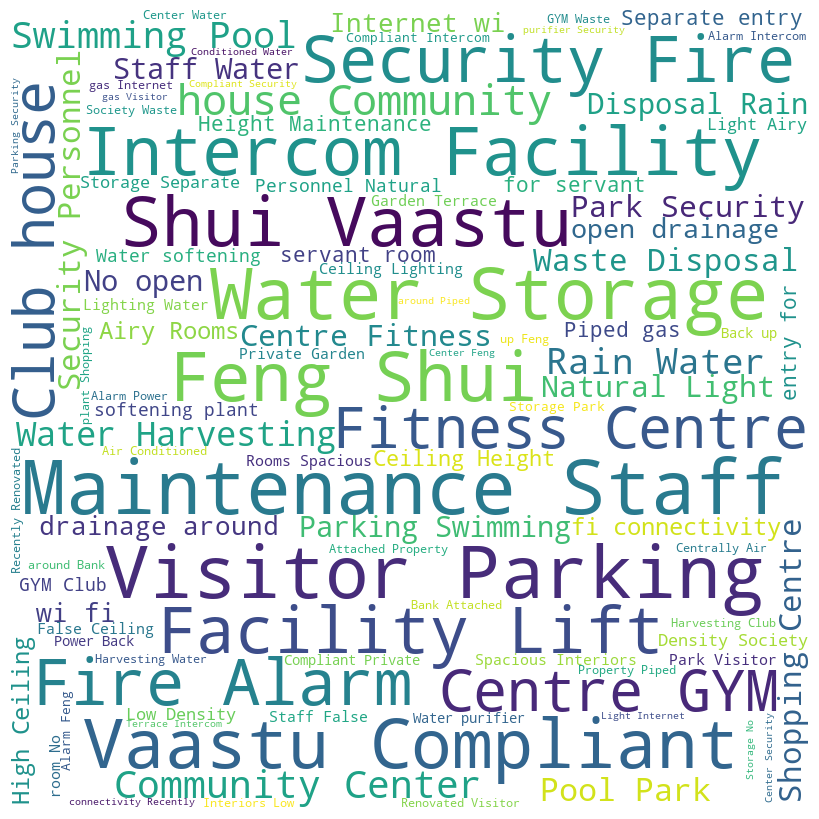

In [34]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [36]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [37]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [38]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [39]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16216\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Dell\AppData\Local\Temp\ipykernel_16216\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

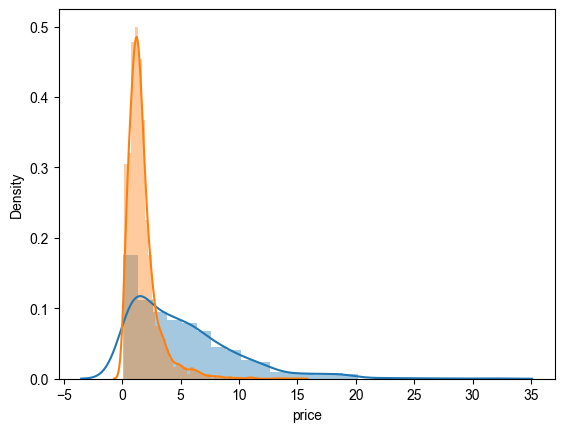

In [40]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [41]:
new_df['sector'].unique().tolist().insert(0,'overall')